In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files

# Prompt the user to upload the file
uploaded = files.upload()



Saving CO2 emissions -Canada.csv to CO2 emissions -Canada (3).csv


In [ ]:
import pandas as pd

# Load the dataset, skipping the first 52 rows to avoid metadata
file_path = 'CO2 emissions -Canada.csv'

# Skip metadata rows and read the data, specifying that the first row after skipping will be the header
df = pd.read_csv(file_path, skiprows=52)

# Manually set the correct column names
df.columns = ['Yr', 'Mn', 'Date', 'Excel', 'CO2', 'seasonally_adjusted', 'fit', 'seasonally_adjusted_fit', 'CO2_filled', 'seasonally_adjusted_filled']

# Drop the first row which still contains invalid data
df = df.drop(0)

# Reset the index after dropping the first row
df.reset_index(drop=True, inplace=True)

# Inspect the cleaned data
print(df.head())


     Yr   Mn      Date       Excel        CO2 seasonally_adjusted  \
0  1985   01     31062   1985.0411        NaN                 NaN   
1  1985   02     31093   1985.1260        NaN                 NaN   
2  1985   03     31121   1985.2027        NaN                 NaN   
3  1985   04     31152   1985.2877        NaN                 NaN   
4  1985   05     31182   1985.3699     352.60              347.82   

           fit seasonally_adjusted_fit   CO2_filled seasonally_adjusted_filled  
0       350.02                  346.52       350.02                     346.52  
1       350.72                  346.62       350.72                     346.62  
2       351.18                  346.71       351.18                     346.71  
3       351.44                  346.81       351.44                     346.81  
4       351.68                  346.91       352.60                     347.82  


In [ ]:
# Strip any leading/trailing spaces in the 'Mn' column
df['Mn'] = df['Mn'].astype(str).str.strip()

# Ensure that month values are always two digits
df['Mn'] = df['Mn'].str.zfill(2)

# Create the 'Date' column by combining 'Yr' and 'Mn'
df['Date'] = pd.to_datetime(df['Yr'].astype(str) + '-' + df['Mn'], format='%Y-%m')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Check the dataframe after the transformation
print(df.head())


              Yr  Mn       Excel        CO2 seasonally_adjusted          fit  \
Date                                                                           
1985-01-01  1985  01   1985.0411        NaN                 NaN       350.02   
1985-02-01  1985  02   1985.1260        NaN                 NaN       350.72   
1985-03-01  1985  03   1985.2027        NaN                 NaN       351.18   
1985-04-01  1985  04   1985.2877        NaN                 NaN       351.44   
1985-05-01  1985  05   1985.3699     352.60              347.82       351.68   

           seasonally_adjusted_fit   CO2_filled seasonally_adjusted_filled  
Date                                                                        
1985-01-01                  346.52       350.02                     346.52  
1985-02-01                  346.62       350.72                     346.62  
1985-03-01                  346.71       351.18                     346.71  
1985-04-01                  346.81       351.44       

In [ ]:
# Fill missing values with interpolation (linear interpolation by default)
df['CO2'] = df['CO2'].interpolate(method='linear')

# Alternatively, you can drop rows with missing values (if needed)
# df.dropna(inplace=True)

# Check for any remaining missing values
print(df.isna().sum())


Yr                            0
Mn                            0
Excel                         0
CO2                           0
seasonally_adjusted           0
fit                           0
seasonally_adjusted_fit       0
CO2_filled                    0
seasonally_adjusted_filled    0
dtype: int64


<ipython-input-5-9ad7acf3483a>:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['CO2'] = df['CO2'].interpolate(method='linear')


In [ ]:
# Ensure that the 'CO2' column is numeric
df['CO2'] = pd.to_numeric(df['CO2'], errors='coerce')

# Perform interpolation on the 'CO2' column
df['CO2'] = df['CO2'].interpolate(method='linear')

# Check if there are any missing values left
print(df.isna().sum())


Yr                            0
Mn                            0
Excel                         0
CO2                           4
seasonally_adjusted           0
fit                           0
seasonally_adjusted_fit       0
CO2_filled                    0
seasonally_adjusted_filled    0
dtype: int64


In [ ]:
# First, interpolate linearly
df['CO2'] = df['CO2'].interpolate(method='linear')

# Use forward fill and backward fill directly
df['CO2'] = df['CO2'].ffill()  # Forward fill
df['CO2'] = df['CO2'].bfill()  # Backward fill

# Check again for missing values
print(df.isna().sum())


Yr                            0
Mn                            0
Excel                         0
CO2                           0
seasonally_adjusted           0
fit                           0
seasonally_adjusted_fit       0
CO2_filled                    0
seasonally_adjusted_filled    0
dtype: int64


In [ ]:
# Verify data integrity
print(df.head())
print(df.tail())


              Yr  Mn       Excel    CO2 seasonally_adjusted          fit  \
Date                                                                       
1985-01-01  1985  01   1985.0411  352.6                 NaN       350.02   
1985-02-01  1985  02   1985.1260  352.6                 NaN       350.72   
1985-03-01  1985  03   1985.2027  352.6                 NaN       351.18   
1985-04-01  1985  04   1985.2877  352.6                 NaN       351.44   
1985-05-01  1985  05   1985.3699  352.6              347.82       351.68   

           seasonally_adjusted_fit   CO2_filled seasonally_adjusted_filled  
Date                                                                        
1985-01-01                  346.52       350.02                     346.52  
1985-02-01                  346.62       350.72                     346.62  
1985-03-01                  346.71       351.18                     346.71  
1985-04-01                  346.81       351.44                     346.81  
1985-

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
# Select features (independent variable) and target (dependent variable)
X = df[['Excel']]  # Features (you can add more features if needed)
y = df['CO2']  # Target variable


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions using the trained model
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model by calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 35.1324459245566


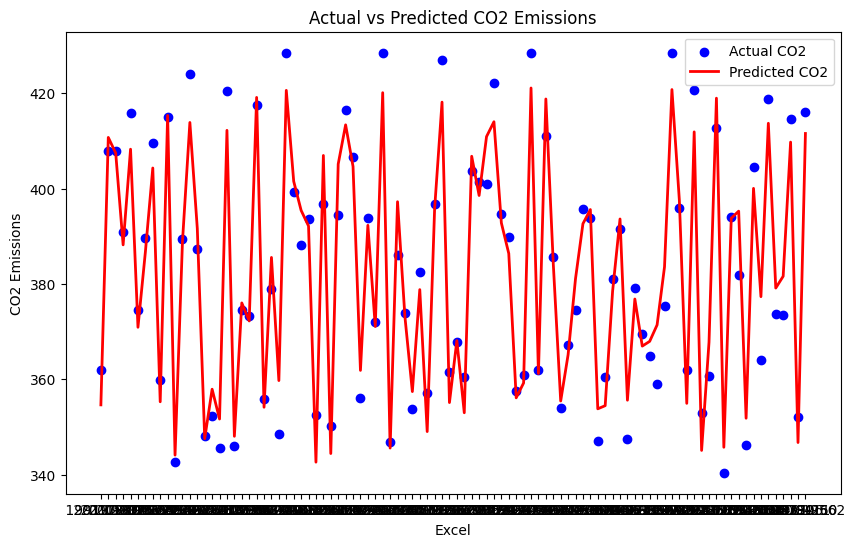

In [ ]:
# Assuming 'Excel' is the feature column in your DataFrame
plt.figure(figsize=(10, 6))

# Use the 'Excel' column from X_test (assuming it's a pandas DataFrame)
plt.scatter(X_test['Excel'], y_test, color='blue', label='Actual CO2')  # Adjust this if necessary
plt.plot(X_test['Excel'], y_pred, color='red', label='Predicted CO2', linewidth=2)

plt.xlabel('Excel')  # Label based on the feature you are using
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.show()


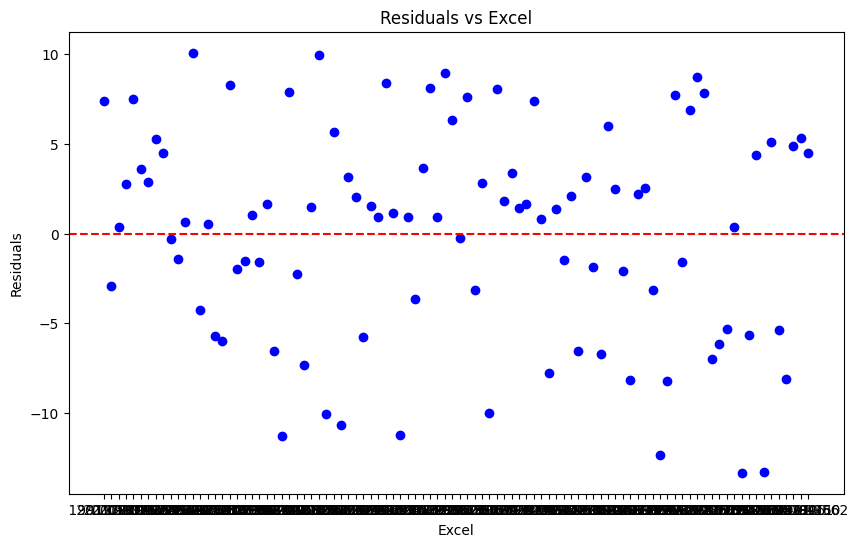

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Excel'], residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Excel')
plt.ylabel('Residuals')
plt.title('Residuals vs Excel')
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


R-squared: 0.9455010086987023
Mean Absolute Error: 4.896915995981051


In [ ]:
new_data = pd.DataFrame({'Excel': [2025.05, 2025.12]})  # Example new data
new_predictions = model.predict(new_data)
print(f"Predictions: {new_predictions}")


Predictions: [421.60856373 421.74673322]


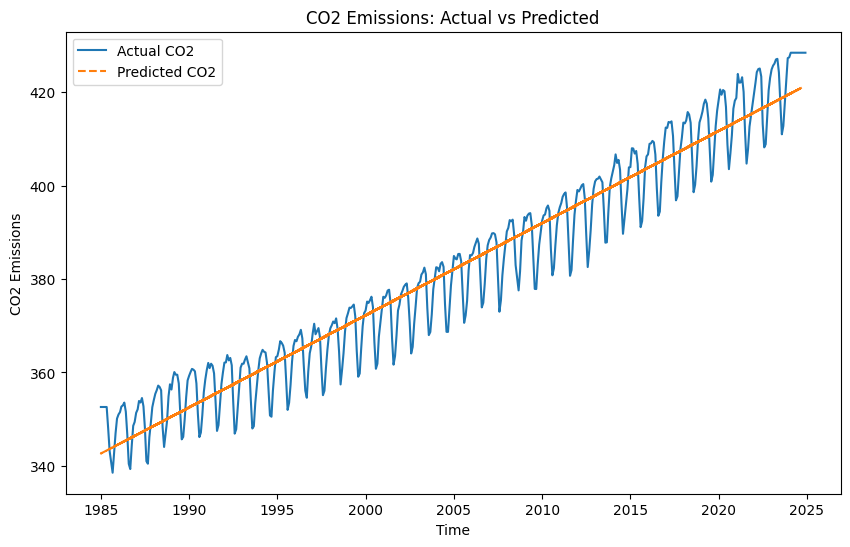

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CO2'], label='Actual CO2')
plt.plot(X_test.index, y_pred, label='Predicted CO2', linestyle='--')
plt.xlabel('Time')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions: Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['CO2'], order=(5, 1, 0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Fit ARIMA model (adjust order as necessary)
model = ARIMA(df['CO2'], order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()

# Print the model summary to see the coefficients
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  480
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1109.376
Date:                Thu, 16 Jan 2025   AIC                           2230.752
Time:                        23:40:56   BIC                           2255.782
Sample:                    01-01-1985   HQIC                          2240.591
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8332      0.048     17.464      0.000       0.740       0.927
ar.L2         -0.4787      0.060     -7.981      0.000      -0.596      -0.361
ar.L3         -0.0429      0.067     -0.643      0.5

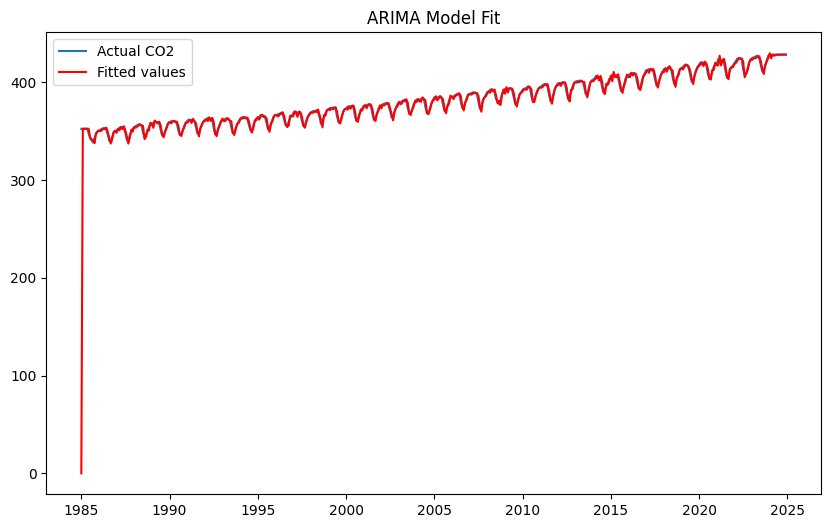

In [ ]:
# Plot the actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(df['CO2'], label='Actual CO2')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted values')
plt.legend(loc='best')
plt.title('ARIMA Model Fit')
plt.show()


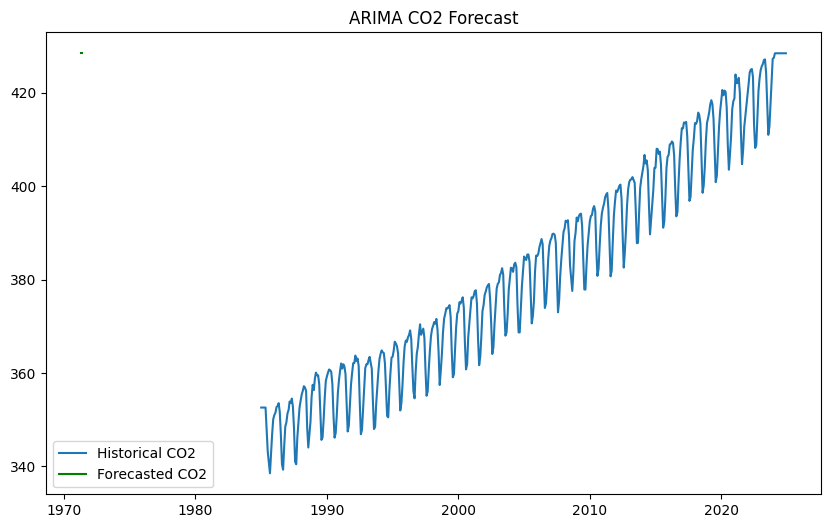

In [ ]:
# Forecast the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values along with historical data
plt.figure(figsize=(10, 6))
plt.plot(df['CO2'], label='Historical CO2')
plt.plot(range(len(df), len(df) + forecast_steps), forecast, color='green', label='Forecasted CO2')
plt.legend(loc='best')
plt.title('ARIMA CO2 Forecast')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate MSE and RMSE
mse = mean_squared_error(df['CO2'], model_fit.fittedvalues)
rmse = sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 265.00226955293476
Root Mean Squared Error: 16.278890304714714


In [ ]:
# Save the model for later use
import pickle

with open('arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)


In [ ]:
import pickle
import numpy as np

# Load the saved ARIMA model
with open('arima_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example: Predicting the next 10 years (assuming 'df' is your data)
# Use the last available value from the dataset (for forecasting)
last_value = df['CO2'].iloc[-1]

# Forecast the next 10 periods (adjust according to your data structure)
forecast = loaded_model.forecast(steps=10)

# Print the forecasted values
print("Forecasted CO2 emissions for the next 10 periods:", forecast)


Forecasted CO2 emissions for the next 10 periods: 2025-01-01    428.49
2025-02-01    428.49
2025-03-01    428.49
2025-04-01    428.49
2025-05-01    428.49
2025-06-01    428.49
2025-07-01    428.49
2025-08-01    428.49
2025-09-01    428.49
2025-10-01    428.49
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# Define your HTML content as a string
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>CO2 Emissions Forecast</title>
</head>
<body>
    <h1>CO2 Emissions Forecast</h1>
    <table border="1">
        <thead>
            <tr>
                <th>Date</th>
                <th>Predicted CO2 Emissions</th>
            </tr>
        </thead>
        <tbody>
            <!-- Add dynamic data here -->
            <tr>
                <td>2025-01-01</td>
                <td>428.49</td>
            </tr>
            <tr>
                <td>2025-02-01</td>
                <td>428.49</td>
            </tr>
            <!-- Add more rows as necessary -->
        </tbody>
    </table>
</body>
</html>
"""

# Write the HTML content to a file in Colab
with open('/content/index.html', 'w') as file:
    file.write(html_content)

# Confirm the file has been created
print("index.html has been saved successfully!")


index.html has been saved successfully!


In [ ]:
# Read the content of the saved HTML file
with open('/content/index.html', 'r') as file:
    print(file.read())



<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>CO2 Emissions Forecast</title>
</head>
<body>
    <h1>CO2 Emissions Forecast</h1>
    <table border="1">
        <thead>
            <tr>
                <th>Date</th>
                <th>Predicted CO2 Emissions</th>
            </tr>
        </thead>
        <tbody>
            <!-- Add dynamic data here -->
            <tr>
                <td>2025-01-01</td>
                <td>428.49</td>
            </tr>
            <tr>
                <td>2025-02-01</td>
                <td>428.49</td>
            </tr>
            <!-- Add more rows as necessary -->
        </tbody>
    </table>
</body>
</html>



In [ ]:
!pip install pyngrok


In [ ]:
!pip install pyngrok
from pyngrok import ngrok

# Replace 'your_authtoken_here' with your ngrok authentication token
ngrok.set_auth_token("2rgg00lzEhSxnuImtoBZWBfuL55_7Udbe6yhrt7YHoc4SNy93")


In [ ]:
from flask import Flask, send_from_directory

# Create Flask app instance
app = Flask(__name__)

@app.route('/')
def home():
    return send_from_directory('/content', 'index.html')

# Run Flask app
app.run(host='0.0.0.0', port=5000)



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!curl http://127.0.0.1:5000


curl: (7) Failed to connect to 127.0.0.1 port 5000 after 0 ms: Connection refused


In [ ]:
from pyngrok import ngrok

public_url = ngrok.connect(5000)
print(f"Flask app is accessible at {public_url}")


Flask app is accessible at NgrokTunnel: "https://f652-34-57-51-140.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return "Flask app is running successfully!"

if __name__ == '__main__':
    # Bind to all available network interfaces and port 5000
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!curl http://127.0.0.1:5000
